In [1]:
#import required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data and make a copy of it
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_original = train.copy()
test_original = test.copy()

In [3]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

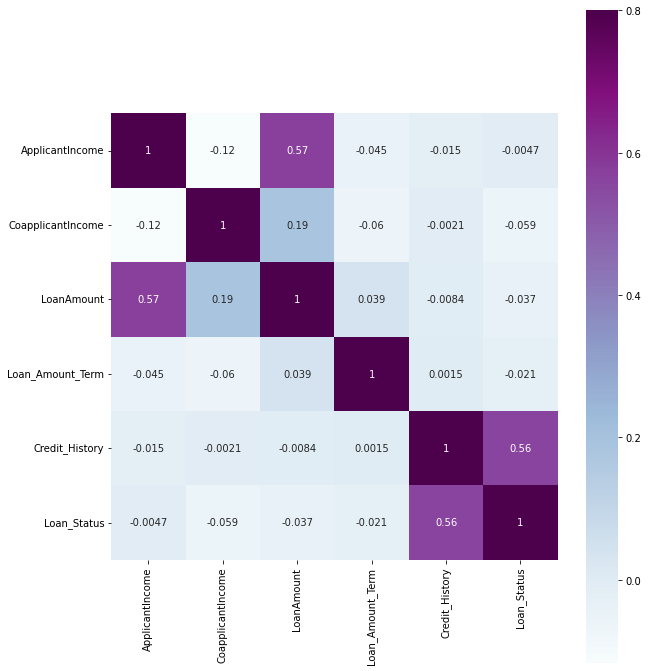

In [4]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

In [5]:
#missing value imputation

train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [6]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

<AxesSubplot:>

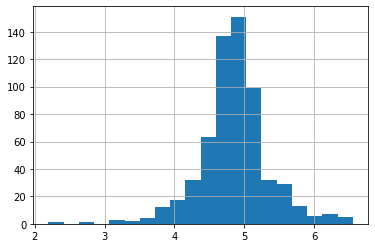

In [8]:
# Loan amount log value to remove skewness

train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

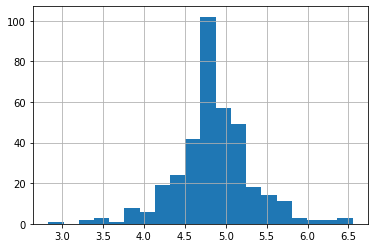

In [9]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

In [10]:
# Create new features

#Total income

train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

train["TotalIncome_log"]=np.log(train["TotalIncome"])
test["TotalIncome_log"] = np.log(train["TotalIncome"])

# EMI 

train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

#Balance Income

train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

In [11]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)


In [12]:
#Model building

train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [13]:
X=train.drop("Loan_Status",1)
y=train[["Loan_Status"]]

In [14]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

print(train.head(3))
print(test.head(3))

   Credit_History  Loan_Status  LoanAmount_log  TotalIncome  TotalIncome_log  \
0             1.0            1        4.852030       5849.0         8.674026   
1             1.0            0        4.852030       6091.0         8.714568   
2             1.0            1        4.189655       3000.0         8.006368   

        EMI  Balance_Income  Gender_Female  Gender_Male  Married_No  ...  \
0  0.355556     5493.444444              0            1           1  ...   
1  0.355556     5735.444444              0            1           0  ...   
2  0.183333     2816.666667              0            1           0  ...   

   Dependents_0  Dependents_1  Dependents_2  Education_Graduate  \
0             1             0             0                   1   
1             0             1             0                   1   
2             1             0             0                   1   

   Education_Not Graduate  Self_Employed_No  Self_Employed_Yes  \
0                       0              

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib 

logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(x_train,y_train)
joblib.dump(logistic_model, "logistic_model.sav")

pred_cv_logistic=logistic_model.predict(x_cv)
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
print(score_logistic)

75.67567567567568


In [17]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib 

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
joblib.dump(tree_model, "tree_model.sav")

pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
print(score_tree)

71.35135135135135


In [18]:
#Random Forest  

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib 

forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)
joblib.dump(forest_model, "forest_model.sav")

pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print(score_forest)

77.83783783783784


In [2]:
type(<input onauxclick=alert(document.cookie)>)

SyntaxError: invalid syntax (3291010002.py, line 1)